<a href="https://colab.research.google.com/github/sharinair14/Basic-ML-Practice/blob/master/Linear_Regression(Using_Polynomial_Regression)_Advertising_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [66]:
ad_data = pd.read_csv('/content/Advertising.csv',index_col=0)



In [67]:
ad_data.head()

,TV,radio,newspaper,sales
Index,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [68]:
ad_data.shape

(200, 4)

In [69]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [70]:
ad_data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [71]:
ad_data.head()

,TV,radio,newspaper,sales
Index,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Outlier Detection

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


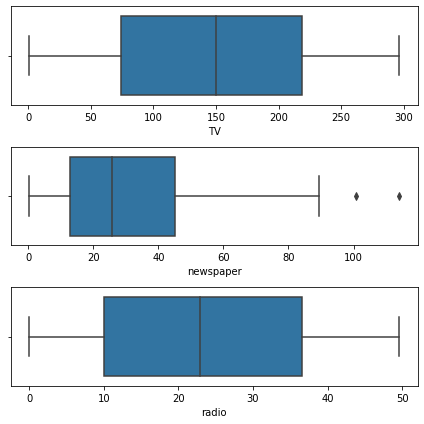

In [80]:
fig,axs=plt.subplots(3,figsize=(6,6))
plt1=sns.boxplot(ad_data['TV'],ax=axs[0])
plt2=sns.boxplot(ad_data['newspaper'],ax=axs[1])
plt3=sns.boxplot(ad_data['radio'],ax=axs[2])
plt.tight_layout()

Now we will do some visualization.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


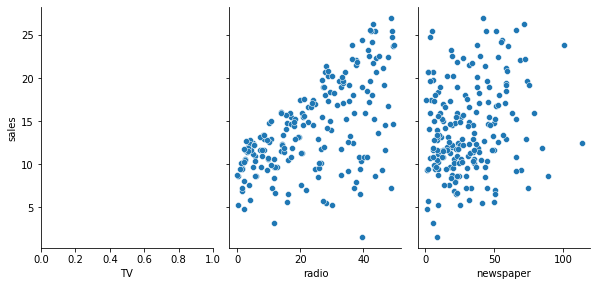

In [72]:
sns.pairplot(data=ad_data,x_vars=['TV','radio','newspaper'],y_vars=['sales'],kind='scatter',size=4,aspect=0.7)

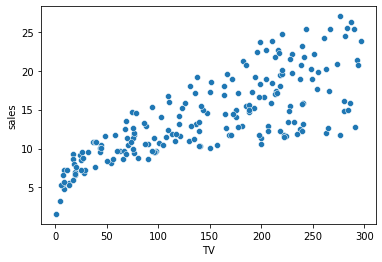

In [73]:
sns.scatterplot(data=ad_data,x='TV',y='sales')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


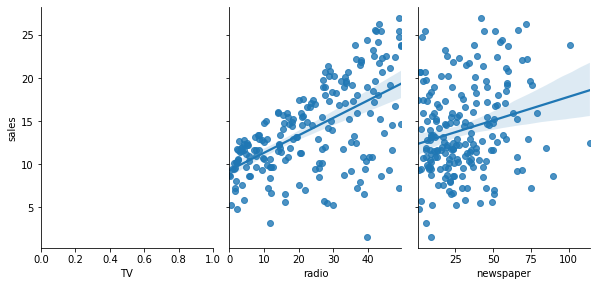

In [74]:
sns.pairplot(data=ad_data,x_vars=['TV','radio','newspaper'],y_vars=['sales'],kind='reg',size=4,aspect=0.7)

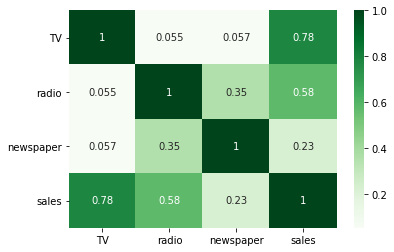

In [76]:
sns.heatmap(ad_data.corr(),annot=True,cmap="Greens")

In [ ]:
df=pd.DataFrame(data=ad_data)

In [ ]:
X=df.iloc[:,[0,1,2]]

In [ ]:
X.head()

In [ ]:
y=df['sales']

In [ ]:
y.head()

Splitting the dataset into train & test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

Modelling the dataset with Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)
ypred = lr.predict(X_test)

In [ ]:
lr.score(X_test,y_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
print("Mean square error ",mean_squared_error(y_test,ypred))

In [ ]:
print('RMSE score is ',np.sqrt(mean_squared_error(y_test,ypred)))

In [ ]:
print('R2 Score is',r2_score(y_test,ypred))

If we remove newspaper column from the dataset





In [ ]:
X=X.drop('newspaper',axis=1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
ypred1=lr.predict(X_test)

In [ ]:
print("Accuracy is",lr.score(X_train,y_train))

In [ ]:
print("Mean square error ",mean_squared_error(y_test,ypred1))

In [ ]:
print('RMSE score is ',np.sqrt(mean_squared_error(y_test,ypred1)))

In [ ]:
print('R2 Score is',r2_score(y_test,ypred1))

Using Polynomial Feature

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
def create_polynomial(degree):
  poly_features=PolynomialFeatures(degree)
  X_train_poly=poly_features.fit_transform(X_train)
  
  lr_poly=LinearRegression()
  lr_poly.fit(X_train_poly,y_train)
  
  ytrain_poly=lr_poly.predict(X_train_poly)
  ytest_poly=lr_poly.predict(poly_features.fit_transform(X_test))
  
  print('\n For Train Data')
  print("\n RMSE for train data is",np.sqrt(mean_squared_error(y_train,ytrain_poly)))
  print("R2 square for train data",r2_score(y_train,ytrain_poly))
  print('\n For Test Data')
  print("\n RMSE for test data is",np.sqrt(mean_squared_error(y_test,ytest_poly)))
  print("R2 square for test data",r2_score(y_test,ytest_poly))

Predicting train data

In [81]:
create_polynomial(3)


 For Train Data

 RMSE for train data is 0.48462453951952084
R2 square for train data 0.9911126709987962

 For Test Data

 RMSE for test data is 0.5383856446037613
R2 square for test data 0.9902108505163721
